# EDA 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats 
import warnings
warnings.filterwarnings('ignore')

Cargamos los DataSets obtenidos en el ETL y luego revisamos su estreuctura

In [5]:
# Cargar el Dataset para iniciar el analisis
games = pd.read_parquet('../Dataset/games_sistem.parquet') 

In [6]:
games.head(5)

,id,title,developer,release_date,genres,tags,price
0,761140,Lost Summoner Kitty,Kotoshiro,2018-01-04,"[Action, Casual, Indie, Simulation, Strategy]","[Strategy, Action, Indie, Casual, Simulation]",4.99
1,643980,Ironbound,Secret Level SRL,2018-01-04,"[Free to Play, Indie, RPG, Strategy]","[Free to Play, Strategy, Indie, RPG, Card Game...",0.00
2,670290,Real Pool 3D - Poolians,Poolians.com,2017-07-24,"[Casual, Free to Play, Indie, Simulation, Sports]","[Free to Play, Simulation, Sports, Casual, Ind...",0.00
3,767400,弹炸人2222,彼岸领域,2017-12-07,"[Action, Adventure, Casual]","[Action, Adventure, Casual]",0.99
4,772540,Battle Royale Trainer,Trickjump Games Ltd,2018-01-04,"[Action, Adventure, Simulation]","[Action, Adventure, Simulation, FPS, Shooter, ...",3.99


## Primero trabajare con el Datase Games

In [7]:
games.head(10)

,id,title,developer,release_date,genres,tags,price
0,761140,Lost Summoner Kitty,Kotoshiro,2018-01-04,"[Action, Casual, Indie, Simulation, Strategy]","[Strategy, Action, Indie, Casual, Simulation]",4.99
1,643980,Ironbound,Secret Level SRL,2018-01-04,"[Free to Play, Indie, RPG, Strategy]","[Free to Play, Strategy, Indie, RPG, Card Game...",0.00
2,670290,Real Pool 3D - Poolians,Poolians.com,2017-07-24,"[Casual, Free to Play, Indie, Simulation, Sports]","[Free to Play, Simulation, Sports, Casual, Ind...",0.00
3,767400,弹炸人2222,彼岸领域,2017-12-07,"[Action, Adventure, Casual]","[Action, Adventure, Casual]",0.99
4,772540,Battle Royale Trainer,Trickjump Games Ltd,2018-01-04,"[Action, Adventure, Simulation]","[Action, Adventure, Simulation, FPS, Shooter, ...",3.99
5,774277,SNOW - All Access Pro Pass,Poppermost Productions,2018-01-04,"[Free to Play, Indie, Simulation, Sports]","[Free to Play, Indie, Simulation, Sports]",18.99
6,774278,SNOW - All Access Legend Pass,Poppermost Productions,2018-01-04,"[Free to Play, Indie, Simulation, Sports]","[Free to Play, Indie, Simulation, Sports]",29.99
7,770380,Army of Tentacles: (Not) A Cthulhu Dating Sim:...,Stegalosaurus Game Development,2018-01-04,"[Action, Adventure, Casual, Indie, RPG]","[Action, Adventure, RPG, Indie, Casual]",10.99
8,768880,Beach Rules,Copperpick Studio,2018-01-04,"[Casual, Indie]","[Casual, Indie, Pixel Graphics, Cute, 2D]",3.99
9,765320,Planetarium 2 - Zen Odyssey,Ghulam Jewel,2018-01-03,"[Casual, Indie, Simulation]","[Indie, Casual, Simulation]",2.99


Procedo a desanidar la columna genres para generar diversas columnas que contengan el genero del juego. 

Esto permitira un analisis más fluido: 

In [8]:
# Utilizo la funcion explode en la columna "genres" para convertir los valores anidados en filas sepradas
games = games.explode(column='genres')
games

,id,title,developer,release_date,genres,tags,price
0,761140,Lost Summoner Kitty,Kotoshiro,2018-01-04,Action,"[Strategy, Action, Indie, Casual, Simulation]",4.99
0,761140,Lost Summoner Kitty,Kotoshiro,2018-01-04,Casual,"[Strategy, Action, Indie, Casual, Simulation]",4.99
0,761140,Lost Summoner Kitty,Kotoshiro,2018-01-04,Indie,"[Strategy, Action, Indie, Casual, Simulation]",4.99
0,761140,Lost Summoner Kitty,Kotoshiro,2018-01-04,Simulation,"[Strategy, Action, Indie, Casual, Simulation]",4.99
0,761140,Lost Summoner Kitty,Kotoshiro,2018-01-04,Strategy,"[Strategy, Action, Indie, Casual, Simulation]",4.99
...,...,...,...,...,...,...,...
22528,610660,Russian Roads,Laush Dmitriy Sergeevich,2018-01-04,Indie,"[Indie, Simulation, Racing]",1.99
22528,610660,Russian Roads,Laush Dmitriy Sergeevich,2018-01-04,Racing,"[Indie, Simulation, Racing]",1.99
22528,610660,Russian Roads,Laush Dmitriy Sergeevich,2018-01-04,Simulation,"[Indie, Simulation, Racing]",1.99
22529,658870,EXIT 2 - Directions,"xropi,stev3ns",2017-09-02,Casual,"[Indie, Casual, Puzzle, Singleplayer, Atmosphe...",4.99


In [9]:
# Ahora voy a restablecer el índice del Df resultante y descartare el índice anterior
games = games.reset_index(drop=True)

# Luego utilizo la funcion drop para sacar la columna "tags" ya que no la voy a utilizar para este analisis
games = games.drop(['tags'], axis=1)
games

,id,title,developer,release_date,genres,price
0,761140,Lost Summoner Kitty,Kotoshiro,2018-01-04,Action,4.99
1,761140,Lost Summoner Kitty,Kotoshiro,2018-01-04,Casual,4.99
2,761140,Lost Summoner Kitty,Kotoshiro,2018-01-04,Indie,4.99
3,761140,Lost Summoner Kitty,Kotoshiro,2018-01-04,Simulation,4.99
4,761140,Lost Summoner Kitty,Kotoshiro,2018-01-04,Strategy,4.99
...,...,...,...,...,...,...
55607,610660,Russian Roads,Laush Dmitriy Sergeevich,2018-01-04,Indie,1.99
55608,610660,Russian Roads,Laush Dmitriy Sergeevich,2018-01-04,Racing,1.99
55609,610660,Russian Roads,Laush Dmitriy Sergeevich,2018-01-04,Simulation,1.99
55610,658870,EXIT 2 - Directions,"xropi,stev3ns",2017-09-02,Casual,4.99


## Demos una primera vista al EDA con un programa donde obtendremos los 15 generos más jugados

* Obtenemos los 15 generos más jugados

In [10]:
top_genres = games['genres'].value_counts().nlargest(15)
top_genres.head(10)

genres
Indie           12693
Action           9430
Adventure        7021
Casual           6283
Strategy         5213
Simulation       4724
RPG              3809
Free to Play     1458
Early Access     1360
Sports           1032
Name: count, dtype: int64

* Creamos el grafico de barras

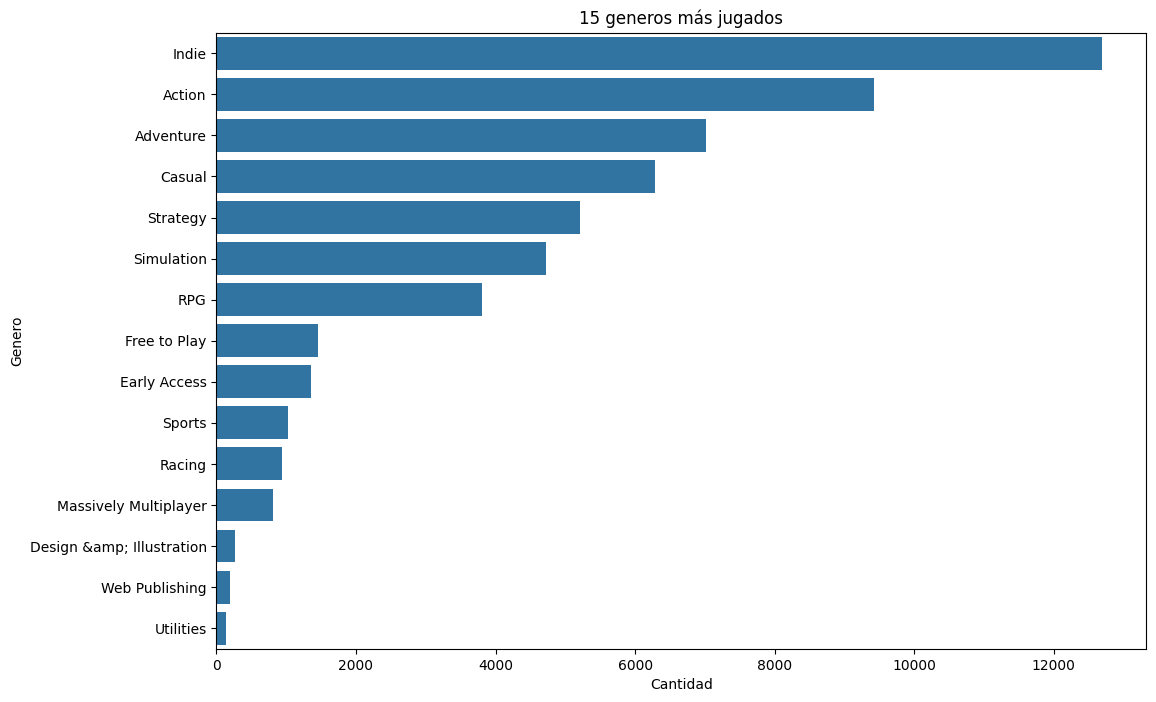

In [11]:
plt.figure(figsize=(12, 8))
sns.barplot(y=top_genres.index, x=top_genres.values)
plt.xlabel('Cantidad')
plt.ylabel('Genero')
plt.title('15 generos más jugados')
plt.show()

# Histograma

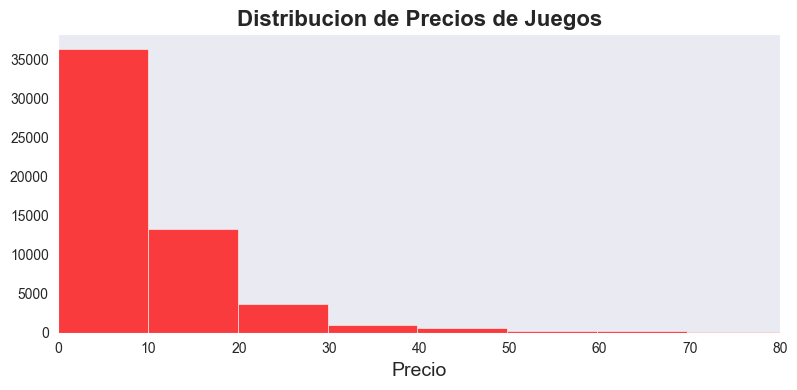

In [12]:
sns.set_style("dark")
plt.figure(figsize=(8,4))

# Crear el grafico
sns.histplot(data=games, x='price', color='red', bins=100)

# Agregar titulo y etiquetas
plt.title('Distribucion de Precios de Juegos', fontsize=16, fontweight='bold')
plt.xlabel('Precio', fontsize=14)
plt.ylabel('')

# Ajustr los margenes
plt.tight_layout()

# Limitar el rango del eje x (precio)
plt.xlim(0, 80)  

# Mostrar el grafico
plt.show()

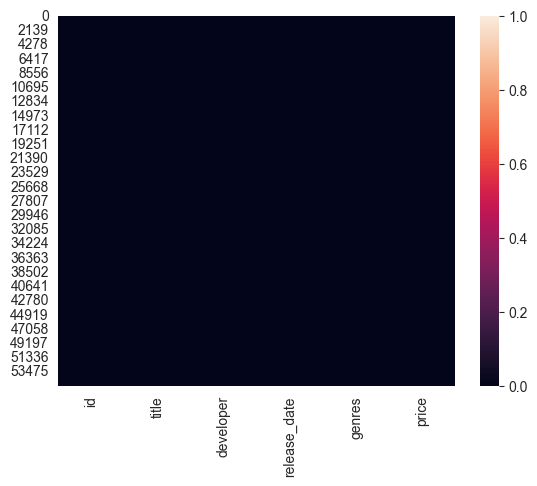

In [19]:
sns.heatmap(games.isnull())
plt.show()